In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%207/Assignment%2011%20to%2016%20data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [3]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [4]:
x = df.drop(["User ID",'Purchased'],axis=1)
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [5]:
ms = MinMaxScaler()
ss = StandardScaler()

In [6]:
X_train = pd.DataFrame(ms.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ms.fit_transform(X_test),columns=X_test.columns)

**Fitting SVM to the Training set**

In [7]:
from sklearn import svm

In [8]:
svm = svm.SVC()

In [9]:
svm.fit(X_train,y_train)

SVC()

**Predicting the Test set results**

In [10]:
y_pred = svm.predict(X_test)

**Making the Confusion Matrix**

In [11]:
accuracy_score(y_pred,y_test)

0.925

In [12]:
confusion_matrix(y_test,y_pred)

array([[50,  4],
       [ 2, 24]])

**Visualising the Training set results**

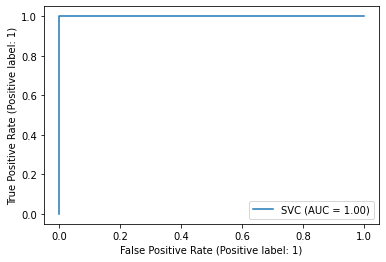

In [13]:
plot_roc_curve(svm, X_train, svm.predict(X_train));

**Visualising the Test set results**

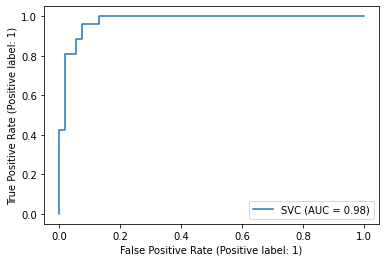

In [14]:
plot_roc_curve(svm, X_test, y_test);